Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

* Data Description:
* Murder -- Muder rates in different places of United States
* Assualt- Assualt rate in different places of United States
* UrbanPop - urban population in different places of United States
* Rape - Rape rate in different places of United States

## Import necessary lib

In [35]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
import seaborn as sns

###  Import dataset

In [2]:
crime_data = pd.read_csv('crime_data.csv')
crime_data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


### Initial analysis 

In [3]:
crime_data.dtypes

Unnamed: 0     object
Murder        float64
Assault         int64
UrbanPop        int64
Rape          float64
dtype: object

In [4]:
crime_data.shape

(50, 5)

In [5]:
crime_data.isna().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

In [6]:
crime_data[crime_data.duplicated()]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape


In [7]:
del crime_data['Unnamed: 0']

In [8]:
crime_data.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


### Create standard function

In [9]:
std_scalar = StandardScaler()
std_data = std_scalar.fit_transform(crime_data)
std_data

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

### use Kmeans clustering
* The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion:

In [10]:
k = []
for i in range(1,15):
    kmeans = KMeans(n_clusters=i,random_state=12)
    kmeans.fit(std_data)
    k.append(kmeans.inertia_)
    print(i,k)

1 [200.0]
2 [200.0, 104.96163315756873]
3 [200.0, 104.96163315756873, 79.95548163171661]
4 [200.0, 104.96163315756873, 79.95548163171661, 57.55425863091106]
5 [200.0, 104.96163315756873, 79.95548163171661, 57.55425863091106, 50.05119672966492]
6 [200.0, 104.96163315756873, 79.95548163171661, 57.55425863091106, 50.05119672966492, 43.74655557175968]
7 [200.0, 104.96163315756873, 79.95548163171661, 57.55425863091106, 50.05119672966492, 43.74655557175968, 39.04129249497444]
8 [200.0, 104.96163315756873, 79.95548163171661, 57.55425863091106, 50.05119672966492, 43.74655557175968, 39.04129249497444, 36.510380047938455]
9 [200.0, 104.96163315756873, 79.95548163171661, 57.55425863091106, 50.05119672966492, 43.74655557175968, 39.04129249497444, 36.510380047938455, 31.07473075771718]
10 [200.0, 104.96163315756873, 79.95548163171661, 57.55425863091106, 50.05119672966492, 43.74655557175968, 39.04129249497444, 36.510380047938455, 31.07473075771718, 28.411528116083325]
11 [200.0, 104.96163315756873, 

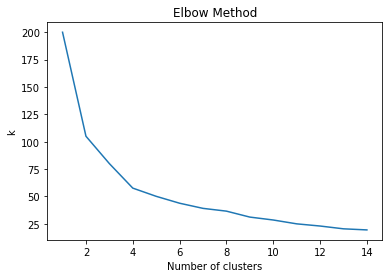

In [11]:
plt.plot(range(1,15),k)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('k')
plt.show()

In [12]:
kmeans1 = KMeans(n_clusters=4,random_state=12)
kmeans1.fit(std_data)

KMeans(n_clusters=4, random_state=12)

In [13]:
kmeans1.labels_

array([1, 2, 2, 1, 2, 2, 3, 3, 2, 1, 3, 0, 2, 3, 0, 3, 0, 1, 0, 2, 3, 2,
       0, 1, 2, 0, 0, 2, 0, 3, 2, 2, 1, 0, 3, 3, 3, 3, 3, 1, 0, 1, 2, 3,
       0, 3, 3, 0, 0, 3])

In [14]:
crime_data['output'] = kmeans1.labels_

In [15]:
crime_data

,Murder,Assault,UrbanPop,Rape,output
0,13.2,236,58,21.2,1
1,10.0,263,48,44.5,2
2,8.1,294,80,31.0,2
3,8.8,190,50,19.5,1
4,9.0,276,91,40.6,2
5,7.9,204,78,38.7,2
6,3.3,110,77,11.1,3
7,5.9,238,72,15.8,3
8,15.4,335,80,31.9,2
9,17.4,211,60,25.8,1


In [16]:
kmeans1.cluster_centers_

array([[-0.97130281, -1.11783581, -0.93954982, -0.97657842],
       [ 1.42622412,  0.88321132, -0.82279055,  0.01946669],
       [ 0.70212683,  1.04999438,  0.72997363,  1.28990383],
       [-0.49440658, -0.3864845 ,  0.58167593, -0.26431024]])

In [17]:
crime_data.groupby('output').agg(['mean']).reset_index()

,output,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,3.600000,78.538462,52.076923,12.176923
1,1,13.937500,243.625000,53.750000,21.412500
2,2,10.815385,257.384615,76.000000,33.192308
3,3,5.656250,138.875000,73.875000,18.781250


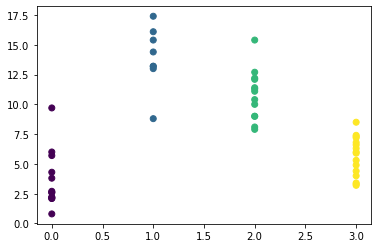

In [18]:
plt.scatter(crime_data['output'],crime_data['Murder'],c = kmeans1.labels_)

### use hierarchical clustering

In [19]:
crime1 = pd.read_csv('crime_data.csv')
crime1.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [20]:
crime2 = crime1.drop(labels= 'Unnamed: 0',axis = 1)
crime2.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


### Use Normalization function

In [21]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [22]:
norm_data = norm_func(crime2)

In [23]:
norm_data.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


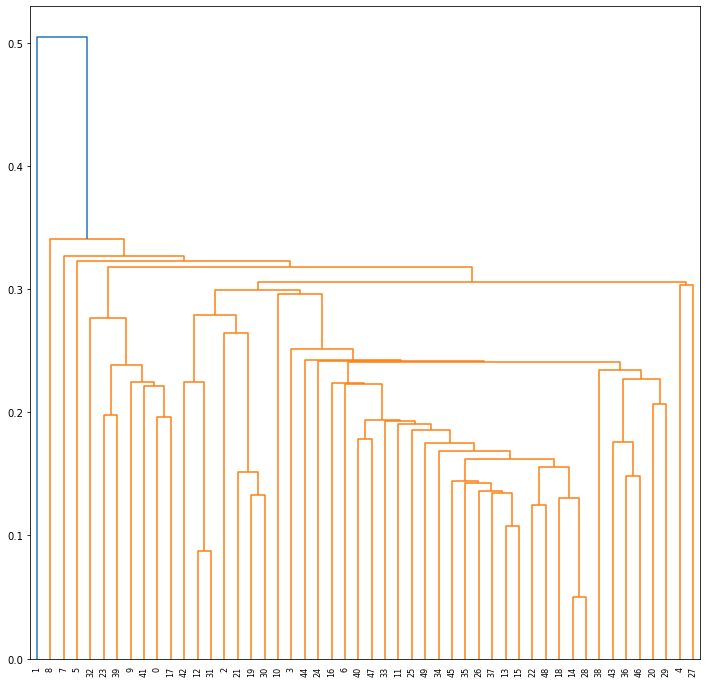

In [24]:
plt.figure(figsize = (12,12))
dendo = sch.dendrogram(sch.linkage(norm_data,method='single'))

In [25]:
hc = AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='ward')

In [26]:
y_hc = hc.fit_predict(norm_data)

In [27]:
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])
Clusters

,Clusters
0,3
1,1
2,1
3,0
4,1
5,1
6,0
7,0
8,1
9,3


In [28]:
crime1['h_cluster']= Clusters

In [29]:
crime1.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,h_cluster
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,1


In [30]:
crime1[crime1['h_cluster']==1]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,h_cluster
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
8,Florida,15.4,335,80,31.9,1
12,Illinois,10.4,249,83,24.0,1
19,Maryland,11.3,300,67,27.8,1
21,Michigan,12.1,255,74,35.1,1
24,Missouri,9.0,178,70,28.2,1
27,Nevada,12.2,252,81,46.0,1


In [31]:
crime1[crime1['h_cluster']==2]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,h_cluster
11,Idaho,2.6,120,54,14.2,2
14,Iowa,2.2,56,57,11.3,2
18,Maine,2.1,83,51,7.8,2
22,Minnesota,2.7,72,66,14.9,2
25,Montana,6.0,109,53,16.4,2
26,Nebraska,4.3,102,62,16.5,2
28,New Hampshire,2.1,57,56,9.5,2
33,North Dakota,0.8,45,44,7.3,2
40,South Dakota,3.8,86,45,12.8,2
44,Vermont,2.2,48,32,11.2,2


In [32]:
crime1[crime1['h_cluster']==3]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,h_cluster
0,Alabama,13.2,236,58,21.2,3
9,Georgia,17.4,211,60,25.8,3
17,Louisiana,15.4,249,66,22.2,3
23,Mississippi,16.1,259,44,17.1,3
32,North Carolina,13.0,337,45,16.1,3
39,South Carolina,14.4,279,48,22.5,3
41,Tennessee,13.2,188,59,26.9,3


In [33]:
crime1[crime1['h_cluster']==4]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,h_cluster


### use DBSCAN clustering

In [40]:
std_data

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [41]:
dbscan = DBSCAN(eps=0.8, min_samples=4)
dbscan.fit(std_data)

DBSCAN(eps=0.8, min_samples=4)

In [42]:
dbscan.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1,  0,  0,  0, -1,
       -1,  0, -1, -1, -1,  0, -1, -1,  0,  0, -1,  0, -1, -1, -1, -1,  0,
        0,  0, -1,  0, -1, -1,  0, -1, -1, -1, -1,  0, -1, -1,  0,  0],
      dtype=int64)

In [43]:
crime2['y_dbscan']= dbscan.labels_

In [44]:
crime2.head()

,Murder,Assault,UrbanPop,Rape,y_dbscan
0,13.2,236,58,21.2,-1
1,10.0,263,48,44.5,-1
2,8.1,294,80,31.0,-1
3,8.8,190,50,19.5,-1
4,9.0,276,91,40.6,-1


In [69]:
crime2.groupby('y_dbscan').agg(['mean']).reset_index()

,y_dbscan,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,-1,9.439394,207.060606,68.303030,24.500000
1,0,4.582353,100.294118,60.176471,14.888235


In [70]:
crime2[crime2['y_dbscan']==-1]

,Murder,Assault,UrbanPop,Rape,y_dbscan
0,13.2,236,58,21.2,-1
1,10.0,263,48,44.5,-1
2,8.1,294,80,31.0,-1
3,8.8,190,50,19.5,-1
4,9.0,276,91,40.6,-1
5,7.9,204,78,38.7,-1
6,3.3,110,77,11.1,-1
7,5.9,238,72,15.8,-1
8,15.4,335,80,31.9,-1
9,17.4,211,60,25.8,-1


In [71]:
crime2[crime2['y_dbscan']==1]

,Murder,Assault,UrbanPop,Rape,y_dbscan


In [72]:
crime2[crime2['y_dbscan']==0]

,Murder,Assault,UrbanPop,Rape,y_dbscan
11,2.6,120,54,14.2,0
13,7.2,113,65,21.0,0
14,2.2,56,57,11.3,0
15,6.0,115,66,18.0,0
18,2.1,83,51,7.8,0
22,2.7,72,66,14.9,0
25,6.0,109,53,16.4,0
26,4.3,102,62,16.5,0
28,2.1,57,56,9.5,0
33,0.8,45,44,7.3,0


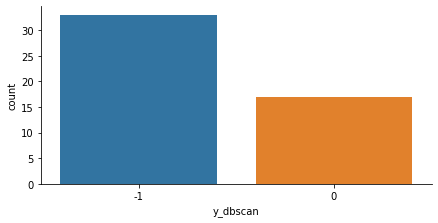

In [45]:
sns.factorplot('y_dbscan',data = crime2,kind = 'count',size = 3,aspect = 2)